In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First, we load in our initial data
df = pd.read_csv('./data/initial_cleaned_data.csv', index_col=0)

# Let's convert the dates to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# Let's add a column for log of the popularity
df['log_popularity'] = np.log(df['popularity'] + 1)

[Text(0.5, 1.0, 'Frequency of Film Releases Over Time')]

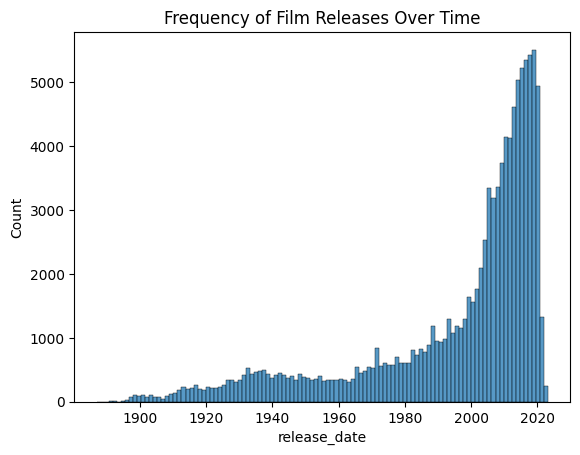

In [3]:
# Show the release dates of movies
sns.histplot(data=df, x="release_date").set(title='Frequency of Film Releases Over Time')

[Text(0.5, 1.0, 'Current Popularity of Films by Release Date')]

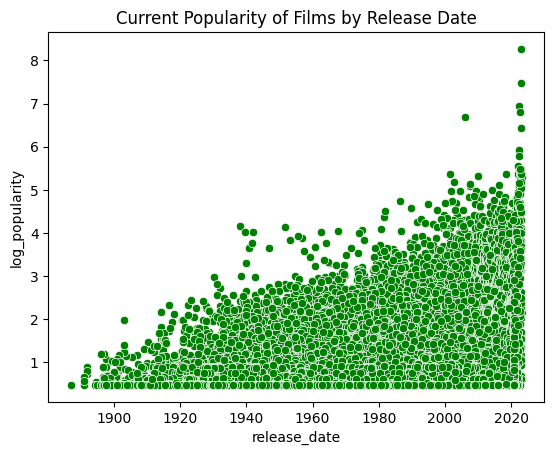

In [4]:
sns.scatterplot(data=df, x='release_date', y='log_popularity', color='green').set(title='Current Popularity of Films by Release Date')

[Text(0.5, 1.0, 'Revenue vs. Budget of Films')]

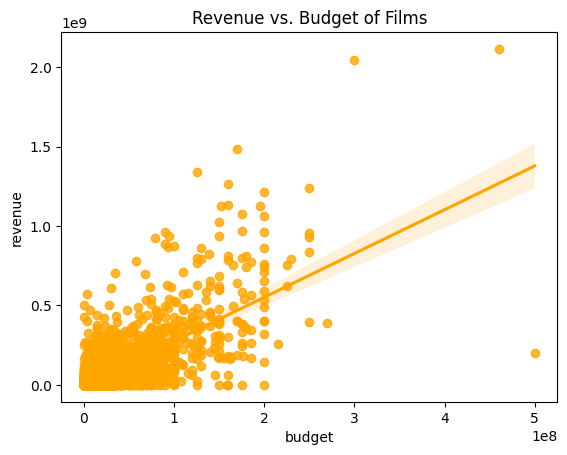

In [5]:
# We have an obvious incorrect value in our dataset. Let's replace it with the mean of the rest of the values
df.loc[df["budget"] > 7e8, "budget"] = np.mean(df.loc[df["budget"] < 7e8, "budget"])
sns.regplot(x="budget", y="revenue", data=df, color="orange").set(title='Revenue vs. Budget of Films')

[Text(0.5, 1.0, 'Frequency of Runtimes in Films'),
 Text(0.5, 0, 'Runtime (min)')]

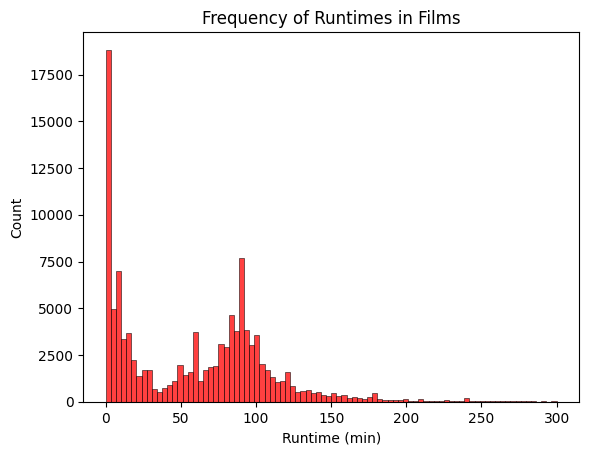

In [6]:
# Some of our runtimes are absurdly large. Let's only plot up to 300 minutes
sns.histplot(data=df, x="runtime", binrange=[0, 300], color='red').set(title='Frequency of Runtimes in Films', xlabel='Runtime (min)')

[Text(0.5, 1.0, 'Length of Titles of Films')]

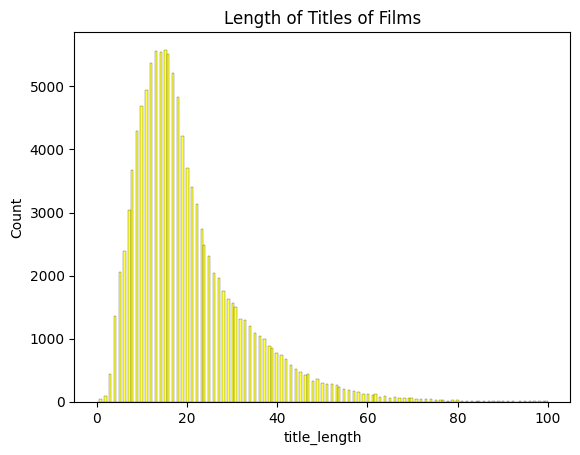

In [7]:
# Make a new column with the character length of each title
df['title'] = df['title'].astype(str)
df['title_length'] = df['title'].apply(len)
# These titles go upwards of 200 characters, let's just look up until 100.
sns.histplot(data=df, x="title_length", color='yellow', binrange=[0,100]).set(title='Length of Titles of Films')

[Text(0.5, 1.0, 'Number of Languages Spoken in Films')]

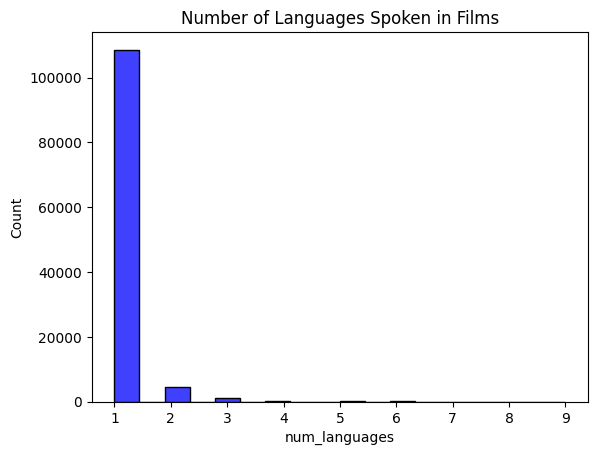

In [8]:
# When loading a CSV, the lists are interpreted as strings. Let's fix that
df['genres'] = df.apply(lambda row: row['genres'].strip('[]').replace("'", '').replace(' ', '').split(','), axis=1)
df['spoken_languages'] = df.apply(lambda row: row['spoken_languages'].strip('[]').replace("'", '').replace(' ', '').split(','), axis=1)
# Let's make a new column, num_languages
df['num_languages'] = df['spoken_languages'].apply(len)
sns.histplot(data=df, x="num_languages", color='blue').set(title='Number of Languages Spoken in Films')

[Text(0.5, 1.0, 'Number of genres of films')]

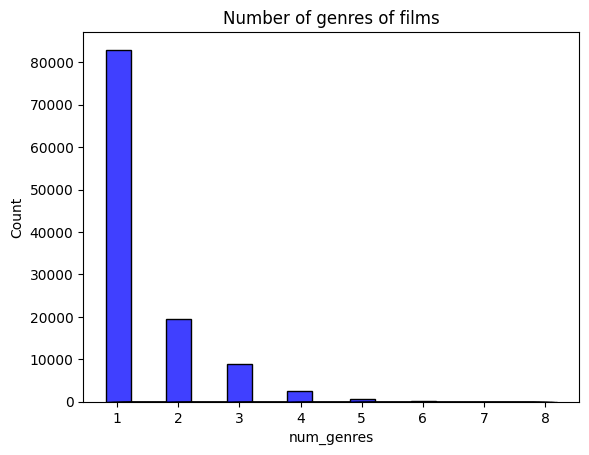

In [9]:
# Let's make a new column, num_genres
df['num_genres'] = df['genres'].apply(len)
sns.histplot(data=df, x="num_genres", color='blue', shrink=10.0).set(title='Number of genres of films')

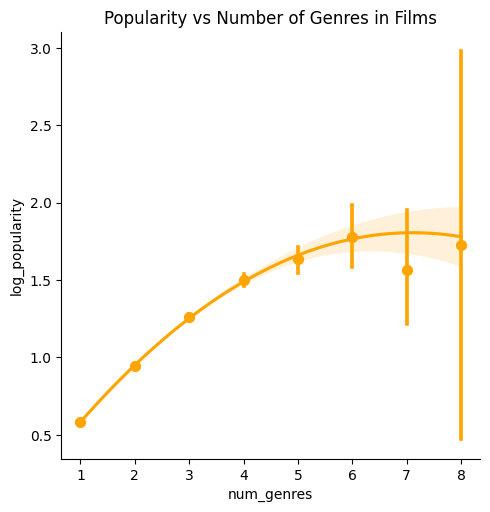

In [10]:
sns.lmplot(data=df, x="num_genres", y='log_popularity', order=2, x_estimator=np.mean,
scatter_kws = {'color': 'orange'}, line_kws = {'color': 'orange'}).set(title='Popularity vs Number of Genres in Films')

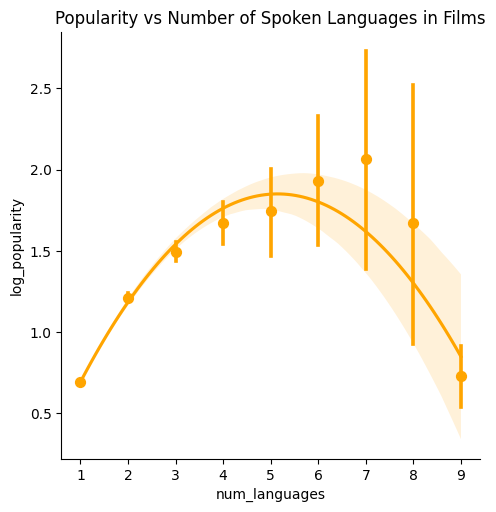

In [11]:
sns.lmplot(data=df, x="num_languages", y='log_popularity', order=2, x_estimator=np.mean,
scatter_kws = {'color': 'orange'}, line_kws = {'color': 'orange'}).set(title='Popularity vs Number of Spoken Languages in Films')

[Text(0.5, 1.0, 'Popularity vs Film Title Lengths')]

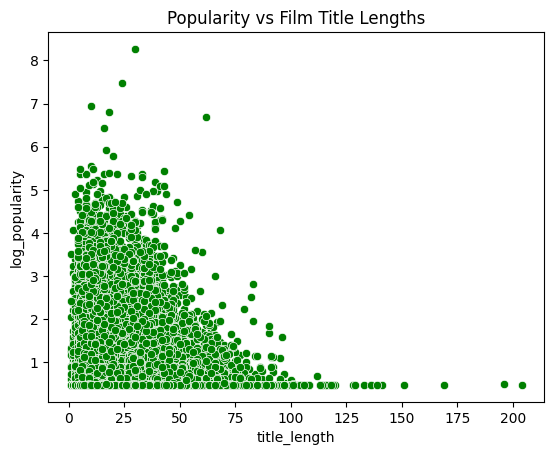

In [12]:
sns.scatterplot(data=df, x="title_length", y='log_popularity', color='green').set(title='Popularity vs Film Title Lengths')

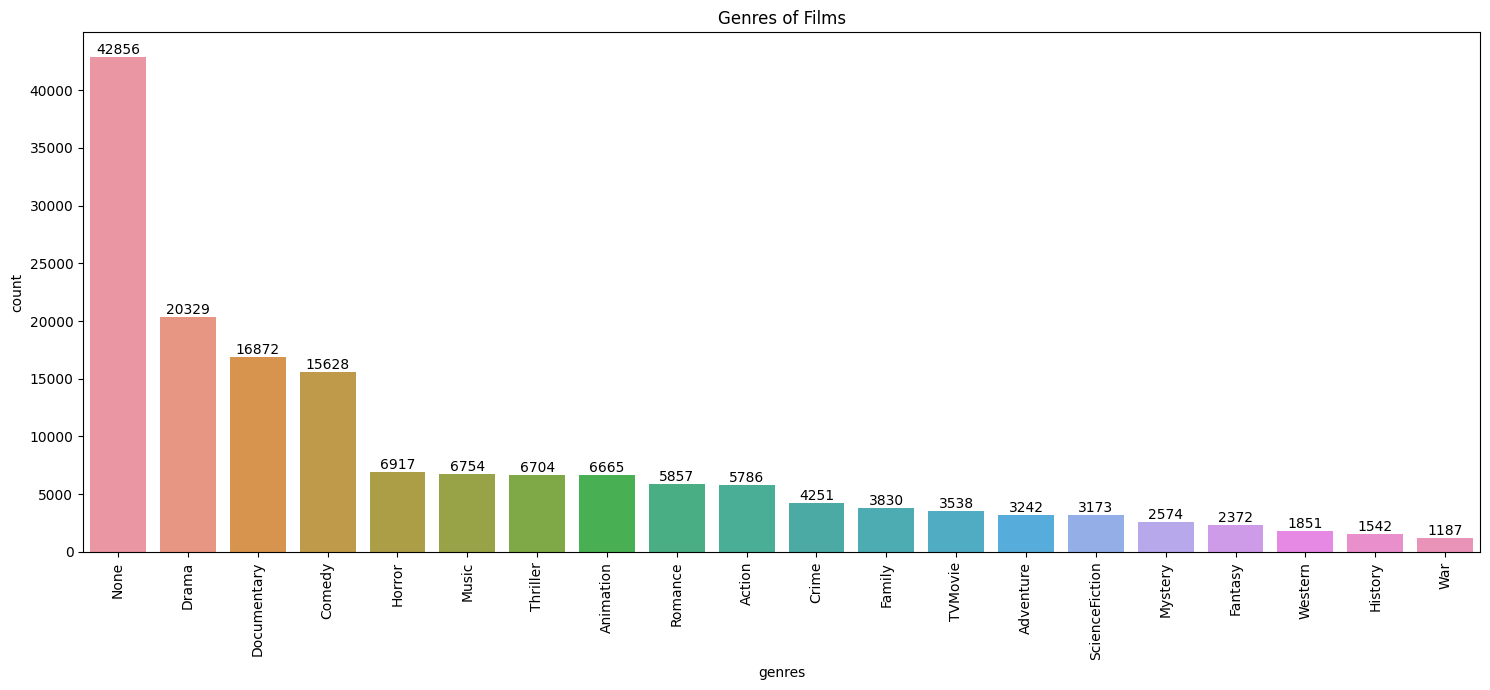

In [17]:
# We want to change the empty list values to "None" for 'genres' and 'spoken_languages'
def handle_empty_lists(lst):
    if list(lst)[0] == '':
        return ['None']
    else:
        return lst

df['genres'] = df['genres'].apply(handle_empty_lists)
# explode the list elements into separate rows
df_exploded = df.explode('genres')

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df_exploded, x='genres', order=df_exploded['genres'].value_counts().index)
ax.set(title='Genres of Films')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.tight_layout()

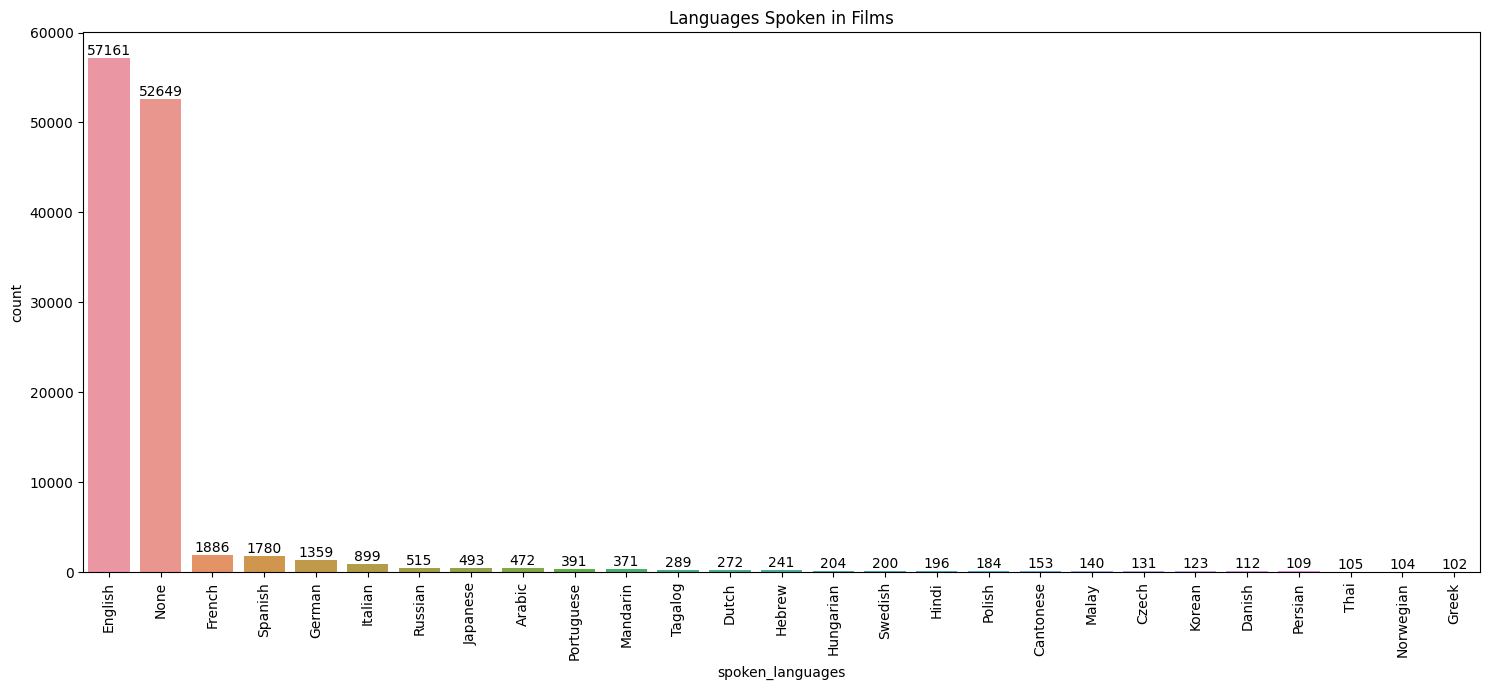

In [14]:
# We want to group the 'NoLanguage' and 'None' values together for spoken_languages
def no_language_fix(lst):
    if list(lst)[0] == 'NoLanguage':
        return ['None']
    else:
        return lst
df['spoken_languages'] = df['spoken_languages'].apply(handle_empty_lists)
df['spoken_languages'] = df['spoken_languages'].apply(no_language_fix)

# explode the list elements into separate rows
df_exploded = df.explode('spoken_languages')
lang_df = df_exploded.groupby('spoken_languages').filter(lambda x : len(x)>100)

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=lang_df, x='spoken_languages', order=lang_df['spoken_languages'].value_counts().index)
ax.set(title='Languages Spoken in Films')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.tight_layout()

In [15]:
# Since we've cleaned some of the data, we can re-save it
df.to_csv('./data/post_vis_cleaned_data.csv')